<a href="https://colab.research.google.com/github/mdietterle/TrabalhosMachineLearningPos/blob/main/Aula2_RegressaoLinear_Weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 2 - Machine Learning

## Exercício de fixação II / Desafio I - Regressão Linear e Árvore de Decisão

### Prof. Dr. José Ahirton Lopes

Esse notebook compreende exercício a partir da utilização de regressão linear.

Nosso exercício é uma regressão linear simples, analisando peso, altura e sexo biológico de 200 pessoas:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
%matplotlib inline

Vamos começar lendo os dados do arquivo .csv denominado "weights.csv":

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving weights.csv to weights.csv
User uploaded file "weights.csv" with length 2022 bytes


In [ ]:
pesos = pd.read_csv('weights.csv', sep=';')

Agora vamos performar alguns passos de análise exploratória, uma das bases da análise em Ciência de Dados e que também nos prepara para o termos um melhor funcionamento e entendimento quanto a nossos algoritmos de IA. 

O primeiro passo é verificar uma parte (5 primeiros registros) que compõem nosso dataframe:

In [ ]:
pesos.head()

,sex,weight,height
0,M,77,182
1,F,58,161
2,F,53,161
3,M,68,177
4,F,59,157


Agora, a partir do describe do Python, também podemos ter acesso a informações tais como quantidade geral de itens de dados, média, média ponderada, máximo e mínimo bem como nossos primeiro, segundo e terceiro quartis, 25%, 50% e 75%:

In [ ]:
pesos.describe()

,weight,height
count,200.000000,200.00000
mean,65.770000,170.46500
std,14.899567,9.09408
min,39.000000,146.00000
25%,55.000000,164.00000
50%,63.000000,169.50000
75%,74.000000,177.25000
max,160.000000,197.00000


A partir do exposto, também podemos verificar valores específicos a partir de características específicas tal como verificar qual o máximo da característica (atributo) peso (weight) para o atributo sexo (sex) se constar como feminino (F). Exemplo:

In [ ]:
pesos.loc[pesos.sex=='F']['weight'].max()

160

In [ ]:
pesos['sex'].value_counts()

F    112
M     88
Name: sex, dtype: int64

Para ter mais possibilidades de análise de nossos dados uma boa prática é verificar nossos histogramas a partir de nosso dataframe. O modo mais simples de se fazer um histograma é do seguinte modo:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18013e7390>,
      dtype=object)

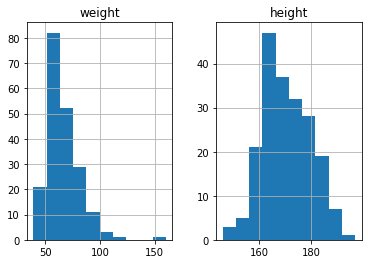

In [ ]:
pesos.hist()

In [ ]:
pesos.dtypes

sex       object
weight     int64
height     int64
dtype: object

In [ ]:
pesos.shape

(200, 3)

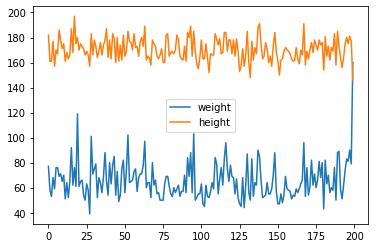

In [ ]:
pesos.plot()

A fim de obtermos mais detalhes sobre os dados numéricos, podemos usar o método describe() novamente:

In [ ]:
pesos.describe()

,weight,height
count,200.000000,200.00000
mean,65.770000,170.46500
std,14.899567,9.09408
min,39.000000,146.00000
25%,55.000000,164.00000
50%,63.000000,169.50000
75%,74.000000,177.25000
max,160.000000,197.00000


Com isso, obtemos o número de exemplos, a média de cada atributo, desvio padrão, valor mínimo, primeiro, segundo e terceiro quartil e valor máximo do atributo, respectivamente.

Para valores discretos podemos usar o método value_counts()

In [ ]:
pesos.sex.value_counts()

F    112
M     88
Name: sex, dtype: int64

Logo, temos que nesta base temos 112 pessoas do sexo feminino e 88 do sexo masculino.

Vamos visualizar esses dados graficamente:

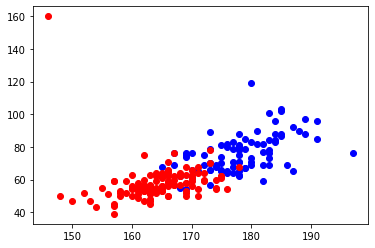

In [ ]:
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], 
            y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], 
            y=pesos.loc[pesos.sex=='F', 'weight'], c='red')

Aqui encontramos um problema. 

Existem alguns pontos muito fora da distribuição de dados (160, 120); esses pontos são nossos outliers. 

Eles podem prejudicar o modelo, porque forçarão a reta para próximo deles. 

Iremos então removê-los.

<br>Veja também que os pesos das pessoas de sexo masculino estão deslocados para a direita, o que indica uma tendência de homens serem mais pesados que as mulheres. Nosso modelo nos mostrará isso.

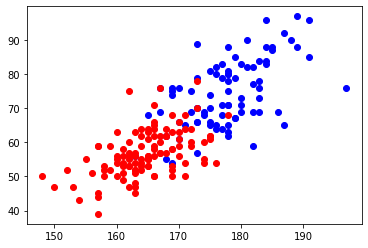

In [ ]:
pesos = pesos[pesos.weight <= 100]
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], 
            y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], 
            y=pesos.loc[pesos.sex=='F', 'weight'], c='red')

Como visto em aula, para o caso de variáveis categóricas devemos utilizar "dummy variables". O método get_dummies do pandas cuida disso. Teremos um valor binário onde 1 corresponde a masculino e 0 a feminino

In [ ]:
pesos.head()

,sex,weight,height
0,M,77,182
1,F,58,161
2,F,53,161
3,M,68,177
4,F,59,157


In [ ]:
dummies_sex = pd.get_dummies(pesos.sex, drop_first=True)
dummies_sex.head()

,M
0,1
1,0
2,0
3,1
4,0


Anexamos as novas colunas à nossa base de dados. 

Axis = 1 neste caso indica que queremos anexar colunas (usar 0 para linhas).

In [ ]:
pesos = pd.concat([pesos, dummies_sex], axis=1)
pesos.head()

,sex,weight,height,M
0,M,77,182,1
1,F,58,161,0
2,F,53,161,0
3,M,68,177,1
4,F,59,157,0


Agora que tratamos os dados, podemos aplicar o método de regressão linear. Para isso especificamos qual será nossa variável dependente (y) e as variáveis independetes (X), ou atributos.

---



In [ ]:
X = pesos[['weight', 'height']]
y = pesos.M

In [ ]:
X.head()

,weight,height
0,77,182
1,58,161
2,53,161
3,68,177
4,59,157


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

**[Desafio I]** - Faça as corretas modificações para que seja feita a predição também por meio de Árvore de Decisão

**Passo 1:** criar dados de treinamento e teste

In [ ]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state= 1)

**Passo 2:** 

1.   usar o parâmetro random_state para criar um estado **determinístico**
2.   Treinar o modelo



In [ ]:
cls = tree.DecisionTreeClassifier(random_state=1)
cls.fit(X_train, y_train)

(39, 2)

**Passo 3:** 

Testar o modelo

In [ ]:
print('Dado atual para o sexo da 10 pessoa dos dados de treinamento:', pesos.sex[y_test.iloc[10]])
print('Dado atual para o sexo predito da 10 pessoa:', pesos.sex[cls.predict([X_test.iloc[10]])])
print('Dado atual para o sexo da 18 pessoa dos dados de treinamento:', pesos.sex[y_test.iloc[18]])
print('Dado atual para o sexo predito da 18 pessoa:', pesos.sex[cls.predict([X_test.iloc[18]])])
print('Dado atual para o sexo da 25 pessoa dos dados de treinamento:', pesos.sex[y_test.iloc[25]])
print('Dado atual para o sexo predito da 25 pessoa:', pesos.sex[cls.predict([X_test.iloc[25]])])
print('Dado atual para o sexo da 30 pessoa dos dados de treinamento:', pesos.sex[y_test.iloc[30]])
print('Dado atual para o sexo predito da 30 pessoa:', pesos.sex[cls.predict([X_test.iloc[30]])])


Dado atual para o sexo da 10 pessoa dos dados de treinamento: F
Dado atual para o sexo predito da 10 pessoa: 1    F
Name: sex, dtype: object
Dado atual para o sexo da 18 pessoa dos dados de treinamento: M
Dado atual para o sexo predito da 18 pessoa: 0    M
Name: sex, dtype: object
Dado atual para o sexo da 25 pessoa dos dados de treinamento: M
Dado atual para o sexo predito da 25 pessoa: 0    M
Name: sex, dtype: object
Dado atual para o sexo da 30 pessoa dos dados de treinamento: F
Dado atual para o sexo predito da 30 pessoa: 1    F
Name: sex, dtype: object


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with

1    0
Name: M, dtype: uint8

**Passo 4:**

Verificar o score do modelo

In [ ]:
cls.score(X_test, y_test)

0.8205128205128205

**Passo 5:**

Visualizar a árvore de decisão

[Text(190.836, 205.35999999999999, 'X[0] <= 64.5\ngini = 0.495\nsamples = 156\nvalue = [86, 70]'),
 Text(127.22400000000002, 181.2, 'X[1] <= 175.5\ngini = 0.167\nsamples = 87\nvalue = [79, 8]'),
 Text(80.352, 157.04, 'X[1] <= 167.5\ngini = 0.113\nsamples = 83\nvalue = [78, 5]'),
 Text(26.784000000000002, 132.88, 'X[0] <= 55.5\ngini = 0.033\nsamples = 59\nvalue = [58, 1]'),
 Text(13.392000000000001, 108.72, 'gini = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(40.176, 108.72, 'X[0] <= 56.5\ngini = 0.077\nsamples = 25\nvalue = [24, 1]'),
 Text(26.784000000000002, 84.56, 'X[1] <= 162.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(13.392000000000001, 60.400000000000006, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(40.176, 60.400000000000006, 'X[1] <= 164.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(26.784000000000002, 36.24000000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(53.568000000000005, 36.24000000000001, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Te

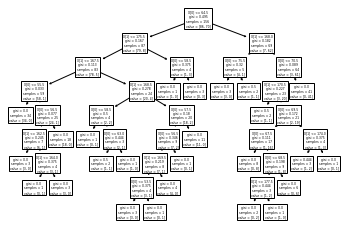

In [ ]:
tree.plot_tree(cls)

Podemos visualizar os coeficientes da reta:

In [ ]:
lin_reg.coef_

array([0.01593571, 0.02416392])

In [ ]:
lin_reg.intercept_

-4.712186171164942

#### **[Exemplo de caso de uso]** 

De acordo com o que vimos na aula, abaixo estão alguns exemplos para cada caso a seguir:

I) Prever o peso de um homem de X quilos, de acordo com sua altura.
II) Prever o peso de uma mulher de X quilos, de acordo com sua altura.
III) Prever a altura de um homem de X metros, de acordo com seu peso.
IV) Prever a altura de uma mulher de X metros, de acordo com seu peso.

**[Desafio]** Faça as corretas modificações para que possamos fazer as predições também por meio de árvore de decisão.

In [ ]:
X = pesos[['M', 'height']]
y = pesos.weight

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
print(f'O peso de um homem de 173cm {lin_reg.predict([[1, 173]])}')
print(f'O peso de um homem de 160cm {lin_reg.predict([[1, 160]])}')
print(f'O peso de uma mulher de 173cm {lin_reg.predict([[0, 173]])}')
print(f'O peso de uma mulher de 160cm {lin_reg.predict([[0, 160]])}')

O peso de um homem de 173cm [70.93469186]
O peso de um homem de 160cm [61.33140063]
O peso de uma mulher de 173cm [63.02122746]
O peso de uma mulher de 160cm [53.41793623]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
X = pesos[['M', 'weight']]
y = pesos.height

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
print(f'A altura de um homem de 80kg {lin_reg.predict([[1, 80]])}')
print(f'A altura de um homem de 100kg {lin_reg.predict([[1, 100]])}')
print(f'A altura de uma mulher de 60kg {lin_reg.predict([[0, 80]])}')
print(f'A altura de uma mulher de 100kg {lin_reg.predict([[0, 100]])}')

A altura de um homem de 80kg [179.90505369]
A altura de um homem de 100kg [187.63142752]
A altura de uma mulher de 60kg [173.62979679]
A altura de uma mulher de 100kg [181.35617062]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
